In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns
from scipy.stats import zscore

In [6]:
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [7]:
summary_stats = benin_data.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         

In [8]:
benin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [11]:
numeric_df= benin_data.select_dtypes(include='number')
negative_columns = numeric_df.columns[(numeric_df<0).any()]
print("columns with negative values are:",negative_columns)
negative_count = (numeric_df < 0).sum()
print("sum of negative values in each numeric columns:")
print(negative_count)

columns with negative values are: Index(['GHI', 'DNI', 'DHI'], dtype='object')
sum of negative values in each numeric columns:
GHI              258847
DNI              275987
DHI              259182
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments              0
dtype: int64


In [12]:

for column in ['GHI', 'DNI', 'DHI']:
    print(benin_data[benin_data[column] < 0][column].describe())


count    258847.000000
mean         -2.841478
std           1.784139
min         -12.900000
25%          -4.200000
50%          -2.000000
75%          -1.500000
max          -0.100000
Name: GHI, dtype: float64
count    275987.000000
mean         -0.484394
std           0.268823
min          -7.800000
25%          -0.600000
50%          -0.400000
75%          -0.300000
max          -0.100000
Name: DNI, dtype: float64
count    259182.000000
mean         -3.313766
std           2.454150
min         -12.600000
25%          -5.100000
50%          -2.200000
75%          -1.400000
max          -0.100000
Name: DHI, dtype: float64


In [145]:
# Check for outliers (e.g., in GHI, DNI, DHI)
outliers = benin_data[(benin_data['GHI'] < 0) | (benin_data['DNI'] < 0) | (benin_data['DHI'] < 0)]
print("Outliers:\n", outliers)

Outliers:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev 

In [19]:
# Convert Timestamp to datetime
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'])

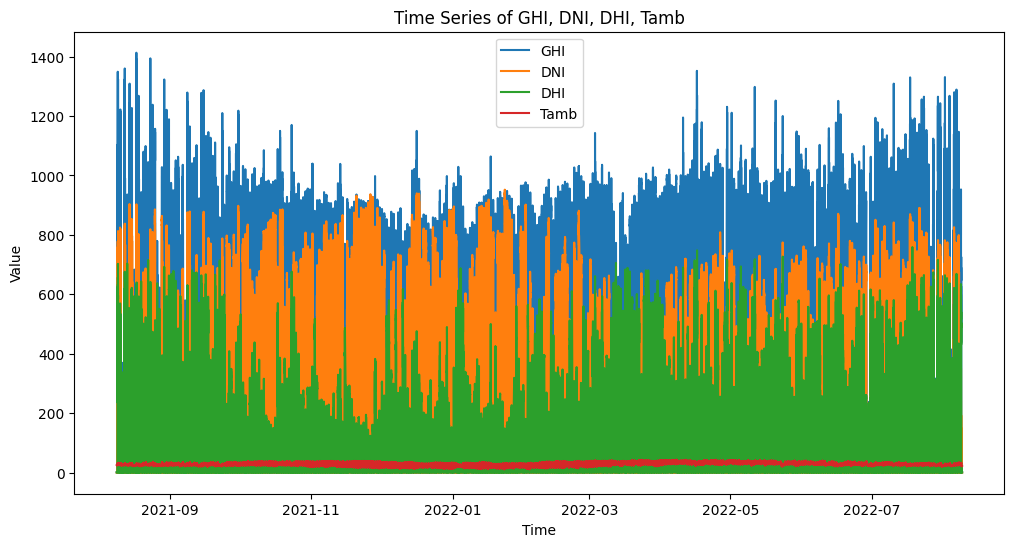

In [20]:
# Plot time series for GHI, DNI, DHI, Tamb
plt.figure(figsize=(12, 6))
plt.plot(benin_data['Timestamp'], benin_data['GHI'], label='GHI')
plt.plot(benin_data['Timestamp'], benin_data['DNI'], label='DNI')
plt.plot(benin_data['Timestamp'], benin_data['DHI'], label='DHI')
plt.plot(benin_data['Timestamp'], benin_data['Tamb'], label='Tamb')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, Tamb')
plt.legend()
plt.show()

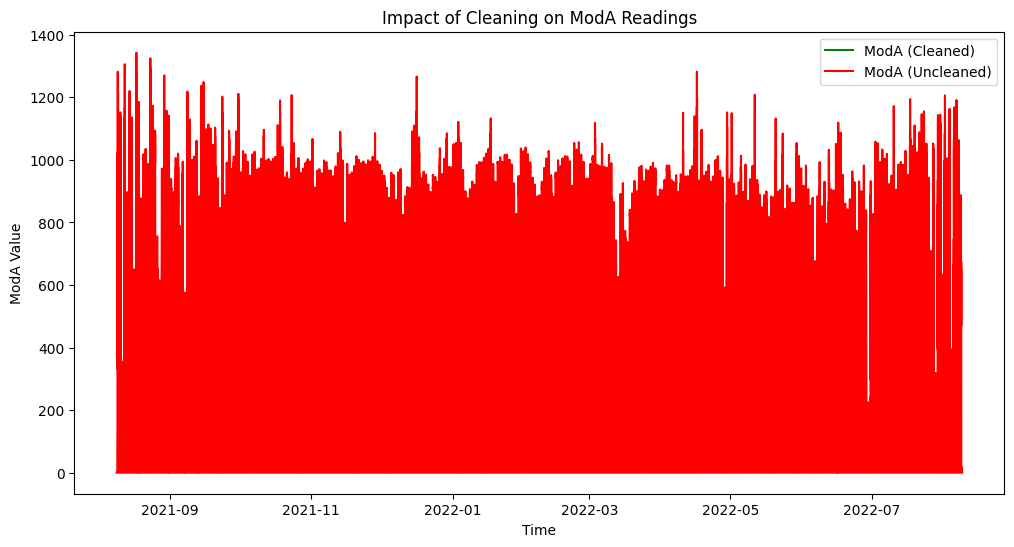

In [21]:
# Compare ModA and ModB readings before and after cleaning
cleaned_data = benin_data[benin_data['Cleaning'] == 1]
uncleaned_data = benin_data[benin_data['Cleaning'] == 0]

plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA (Cleaned)', color='green')
plt.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA (Uncleaned)', color='red')
plt.xlabel('Time')
plt.ylabel('ModA Value')
plt.title('Impact of Cleaning on ModA Readings')
plt.legend()
plt.show()

In [27]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 344.9 kB/s eta 0:00:001m388.9 kB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


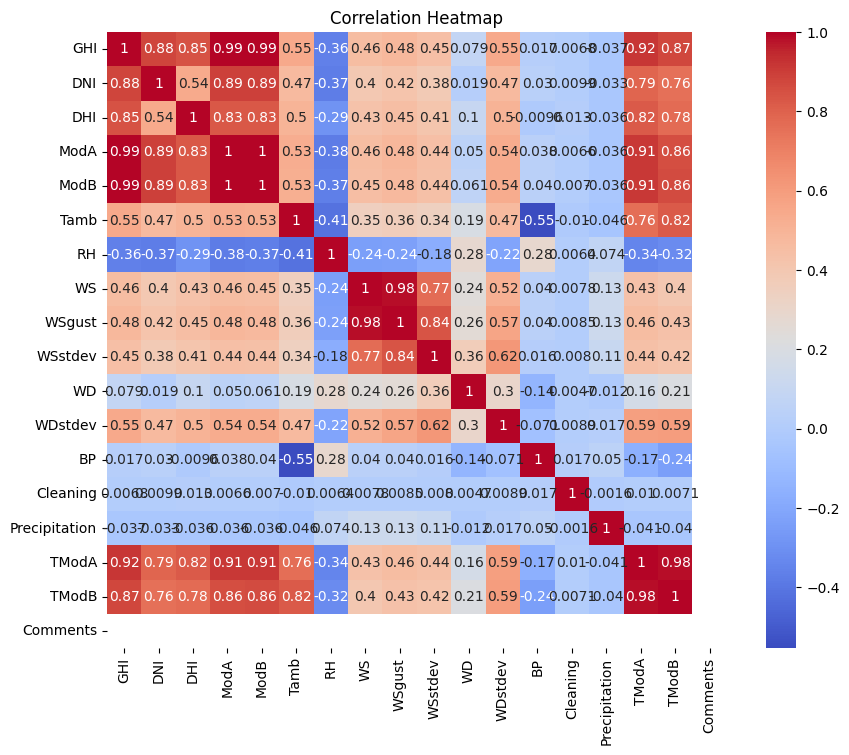

In [31]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = benin_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

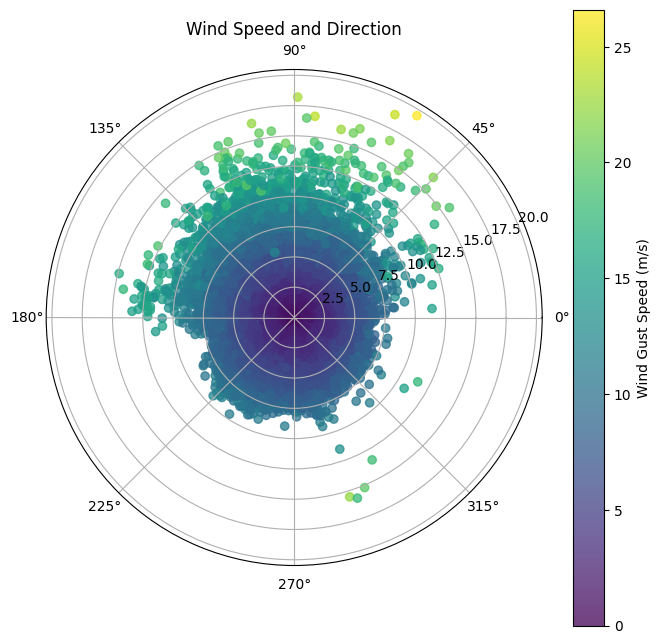

In [32]:
# Polar plot for wind speed and direction

plt.figure(figsize=(8, 8))
plt.subplot(projection='polar')
plt.scatter(benin_data['WD'] * np.pi / 180, benin_data['WS'], c=benin_data['WSgust'], cmap=cm.viridis, alpha=0.75)
plt.colorbar(label='Wind Gust Speed (m/s)')
plt.title('Wind Speed and Direction')
plt.show()

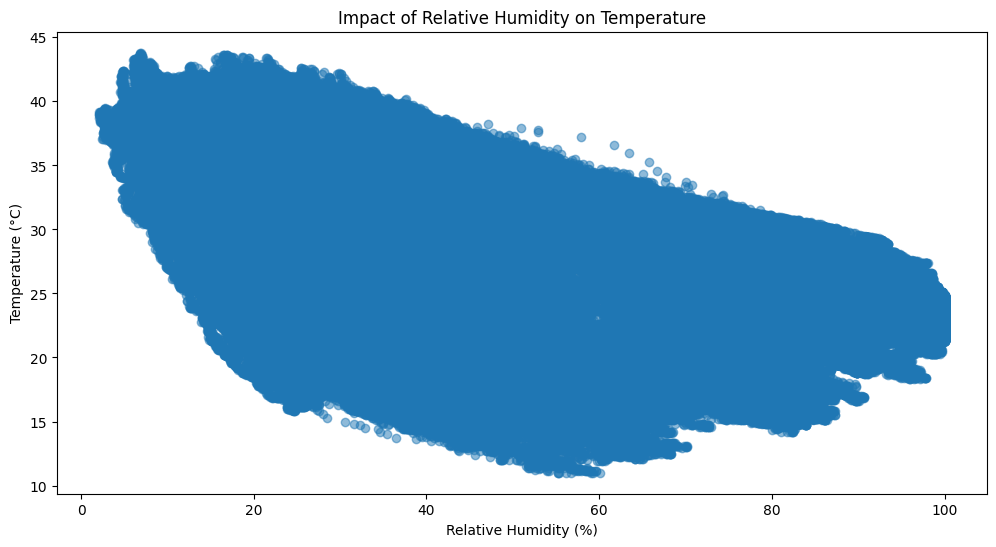

In [33]:
# Scatter plot to explore the influence of RH on temperature
plt.figure(figsize=(12, 6))
plt.scatter(benin_data['RH'], benin_data['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('Impact of Relative Humidity on Temperature')
plt.show()

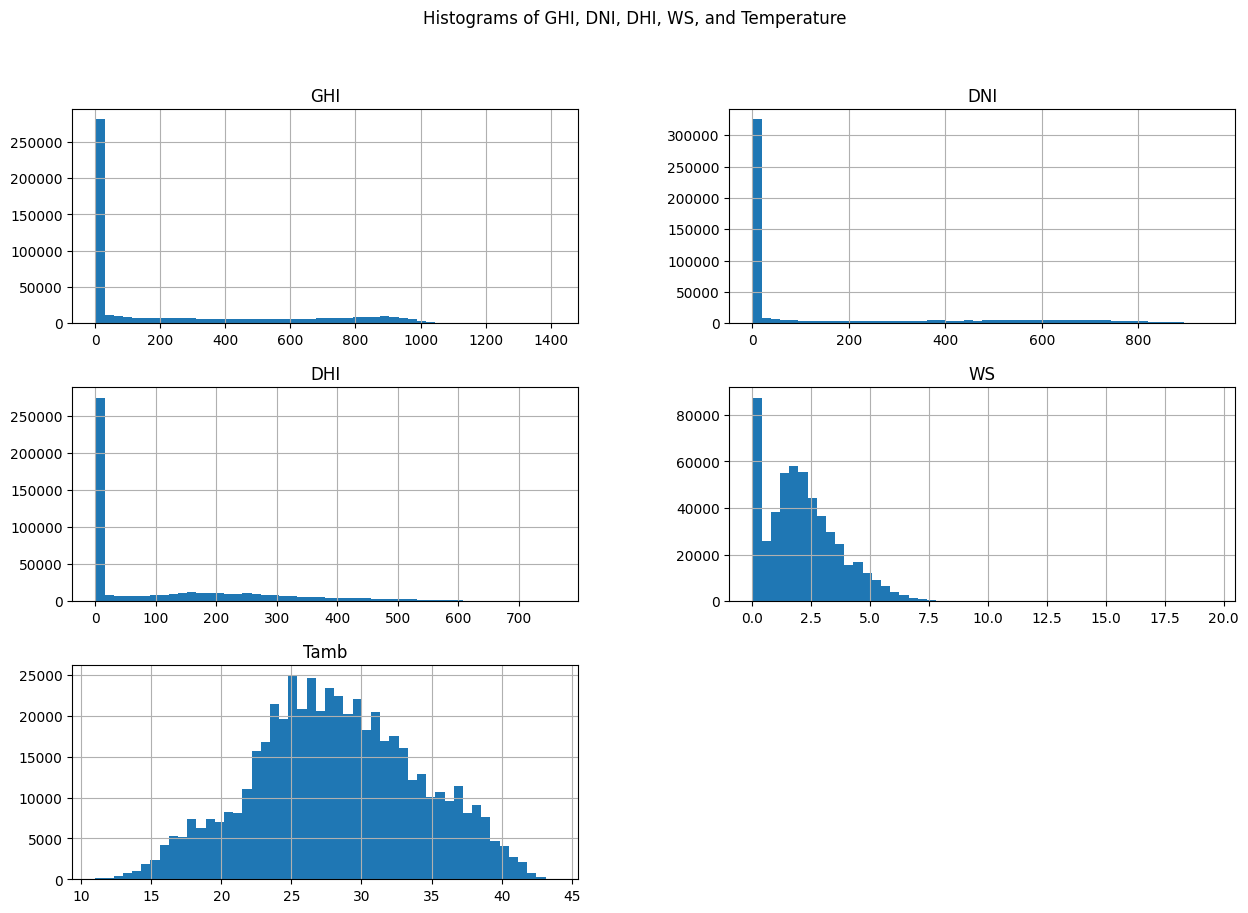

In [34]:
# Create histograms for GHI, DNI, DHI, WS, and temperatures
benin_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
plt.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
plt.show()

In [35]:
# Z-Score Analysis

benin_data['GHI_zscore'] = zscore(benin_data['GHI'])
zscore_outliers = benin_data[benin_data['GHI_zscore'].abs() > 3]
print("Z-Score Outliers:\n", zscore_outliers)

Z-Score Outliers:
                  Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671    2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674    2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676    2021-08-09 11:17:00  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849    2021-08-09 14:10:00  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850    2021-08-09 14:11:00  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
517777 2022-08-03 13:38:00  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7   
520659 2022-08-05 13:40:00  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3   
520696 2022-08-05 14:17:00  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3   
522074 2022-08-06 13:15:00  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075 2022-08-06 13:16:00  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         WS  WSgust 

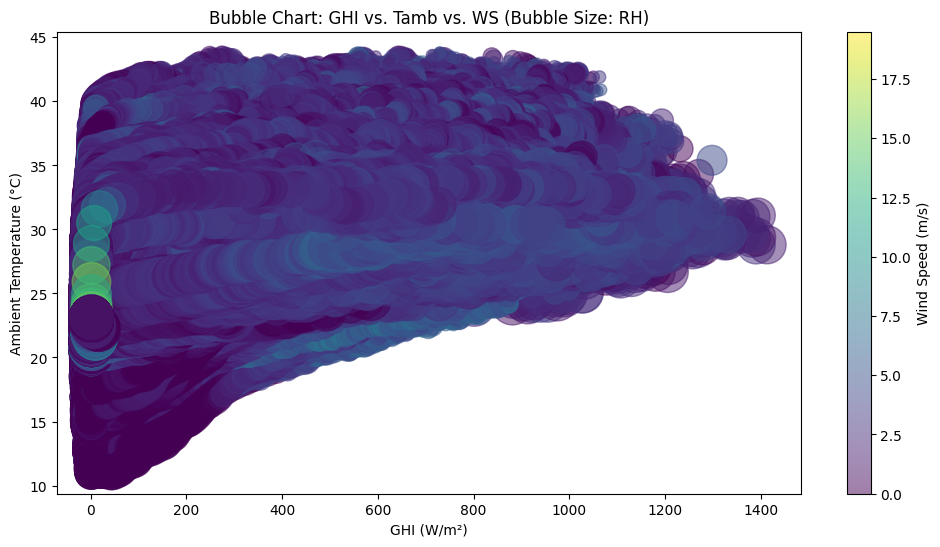

In [36]:
# Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size
plt.figure(figsize=(12, 6))
plt.scatter(benin_data['GHI'], benin_data['Tamb'], s=benin_data['RH']*10, alpha=0.5, c=benin_data['WS'], cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
plt.show()

In [155]:
# Handle missing values 

In [15]:
columns = ['GHI', 'DNI', 'DHI']
for column in columns:
    # Calculate the 75th percentile for negative values
    negative_values = benin_data[benin_data[column] < 0][column]
    if not negative_values.empty:  
        p75 = abs(negative_values.describe()['75%'])  # Get the absolute 75th percentile value
        
        # Replace the negative values with the absolute 75th percentile value
        benin_data.loc[benin_data[column] < 0, column] = p75
        
        print(f"Replaced negative values in '{column}' with {p75}")
    else:
        print(f"No negative values found in '{column}'")



Replaced negative values in 'GHI' with 1.5
Replaced negative values in 'DNI' with 0.3
Replaced negative values in 'DHI' with 1.4


In [17]:
columns = ['GHI', 'DNI', 'DHI']
for column in columns:
    if (benin_data[column] < 0).any():
        print(f"Negative values still present in '{column}'.")
    else:
        print(f"No negative values in '{column}'.")


No negative values in 'GHI'.
No negative values in 'DNI'.
No negative values in 'DHI'.


In [162]:
benin_data_cleaned = benin_data.dropna(axis=1, how='all')  

In [ ]:
benin_data.head()